# Summary 
    This notebook contains the code for plotting performance of several models deployed on different micrcontrollers. 
### Details of microcontrollers that are used shown in table below.

<img src="images/mcu_specs.png" alt="drawing" width="960"/>


### Models include:

#### **- Dense Model and Quantized version**

![MyImage](images/dense_model_netron.png)
![MyImage](images/dense_model_optimized.png)

#### **- Custom Convolutional Model and Quantized version**

![MyImage](images/my_custom_conv_model.png)
![MyImage](images/my_custom_conv_model_optimized.png)

#### **- Convolutional Model described in Paper and Quantized version (Modified for TF-Lite Compatibility)**

![MyImage](images/conv_model_paper_2D.png)
![MyImage](images/conv_model_paper_2D_optimized.png)

#### Where does these plot datas come from?
This plot data is generated from the deployed AI models to microcontrollers described above. Models are created with the notebook : 
<a href="./convert_deploy.ipynb" class="header__link">here</a>, and this notebook generates information related to model performance, such as training accuracy, evaluation accuracy, tflite test accuracy and tf lite size information. Then generated models are deployed to microcontrollers using <a href="./final_acustic_models/final_acustic_models.ino" class="header__link">this</a> and <a href="./final_acustic_models/model.h" class="header__link">this</a>. Once the models are deployed, the inference time information is recorded and saved to a csv file in [here](mcu-data-to-plot.csv). A snapshot of the csv file can be seen below.

<img src="images/mcu-performance-table-data.png" alt="drawing" width="960"/>

### Import libraries for plotting, and plot training results for each model

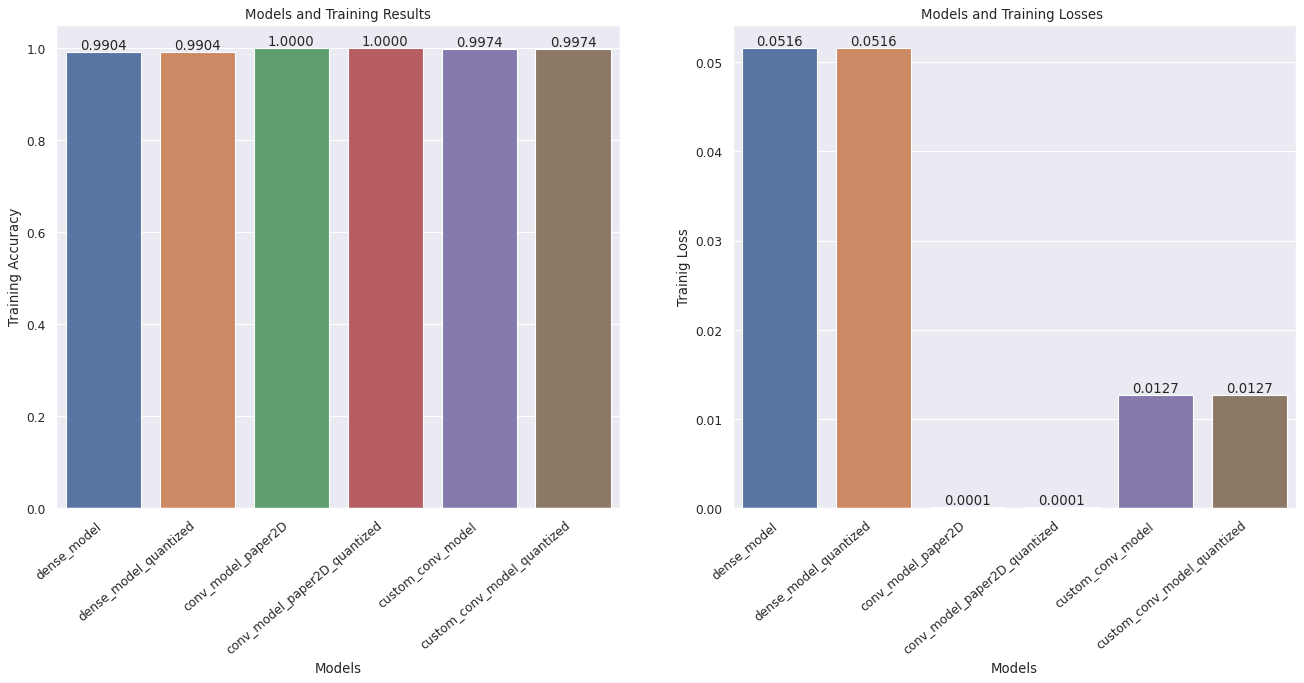

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from turtle import position

sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
cols = model_mcu_data.columns
model_mcu_data[cols] = model_mcu_data[cols].replace({'0':np.nan, 0:np.nan})

fig, ax1 = plt.subplots(1,2)
###================================================================================================
g = sns.barplot(x="model", y="training_acc",data=model_mcu_data, ax=ax1[0])

ax1[0].set_ylabel('Training Accuracy')
ax1[0].set_xlabel('Models')
ax1[0].set_title('Models and Training Results')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================

g = sns.barplot(x="model", y="training_loss",data=model_mcu_data, ax=ax1[1])

ax1[1].set_ylabel('Trainig Loss')
ax1[1].set_xlabel('Models')
ax1[1].set_title('Models and Training Losses ')
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[1].bar_label(c, labels=labels, label_type='edge')    
###================================================================================================


### Plot evaluation results for models

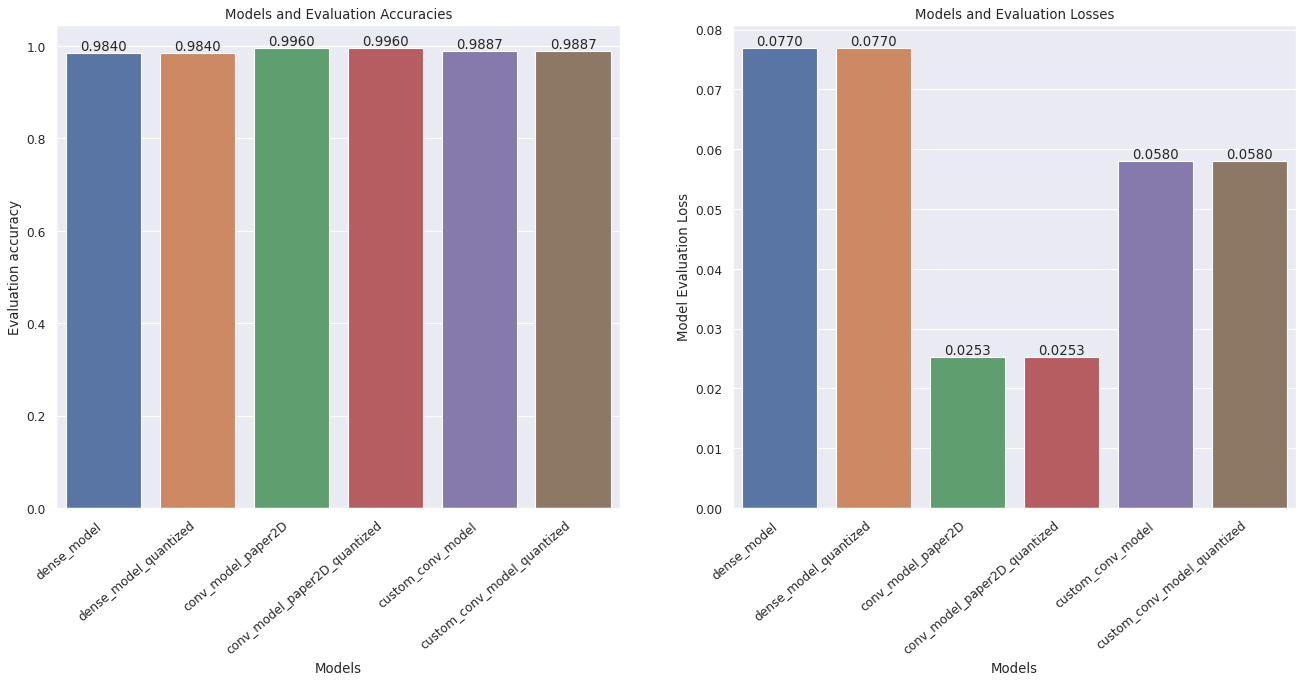

In [3]:

fig, ax1 = plt.subplots(1,2)
###================================================================================================
g = sns.barplot(x="model", y="validation_acc",data=model_mcu_data, ax=ax1[0])

ax1[0].set_ylabel('Evaluation accuracy')
ax1[0].set_xlabel('Models')
ax1[0].set_title('Models and Evaluation Accuracies')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y="validation_loss",data=model_mcu_data, ax=ax1[1])
ax1[1].set_ylabel('Model Evaluation Loss')
ax1[1].set_xlabel('Models')
ax1[1].set_title('Models and Evaluation Losses')
ax1[1].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[1].bar_label(c, labels=labels, label_type='edge')              
###================================================================================================


### Plot TF-Lite results for models

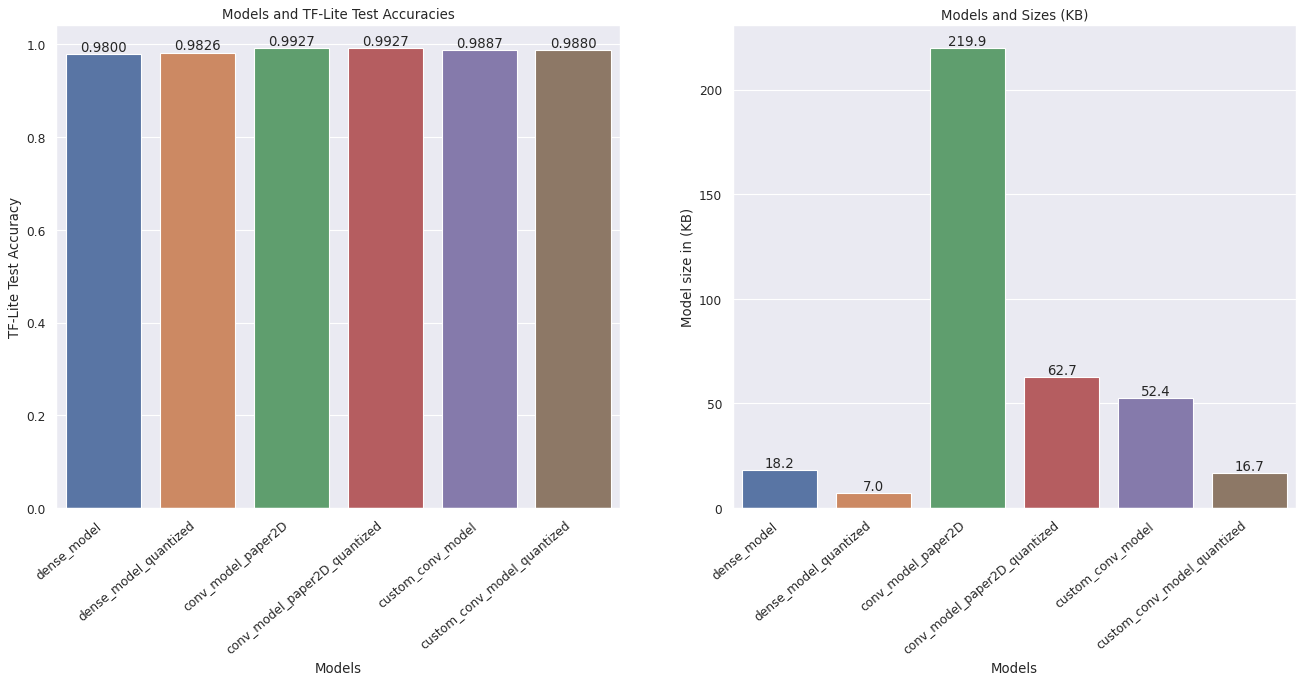

In [4]:

fig, ax1 = plt.subplots(1,2)
###================================================================================================
g = sns.barplot(x="model", y="tflite_test_acc",data=model_mcu_data, ax=ax1[0])

ax1[0].set_ylabel('TF-Lite Test Accuracy')
ax1[0].set_xlabel('Models')
ax1[0].set_title('Models and TF-Lite Test Accuracies')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y=model_mcu_data.tflite_model_size_bytes/1000,data=model_mcu_data, ax=ax1[1])
ax1[1].set_ylabel('Model size in (KB)')
ax1[1].set_xlabel('Models')
ax1[1].set_title('Models and Sizes (KB)')
ax1[1].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1].containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax1[1].bar_label(c, labels=labels, label_type='edge')              
###================================================================================================


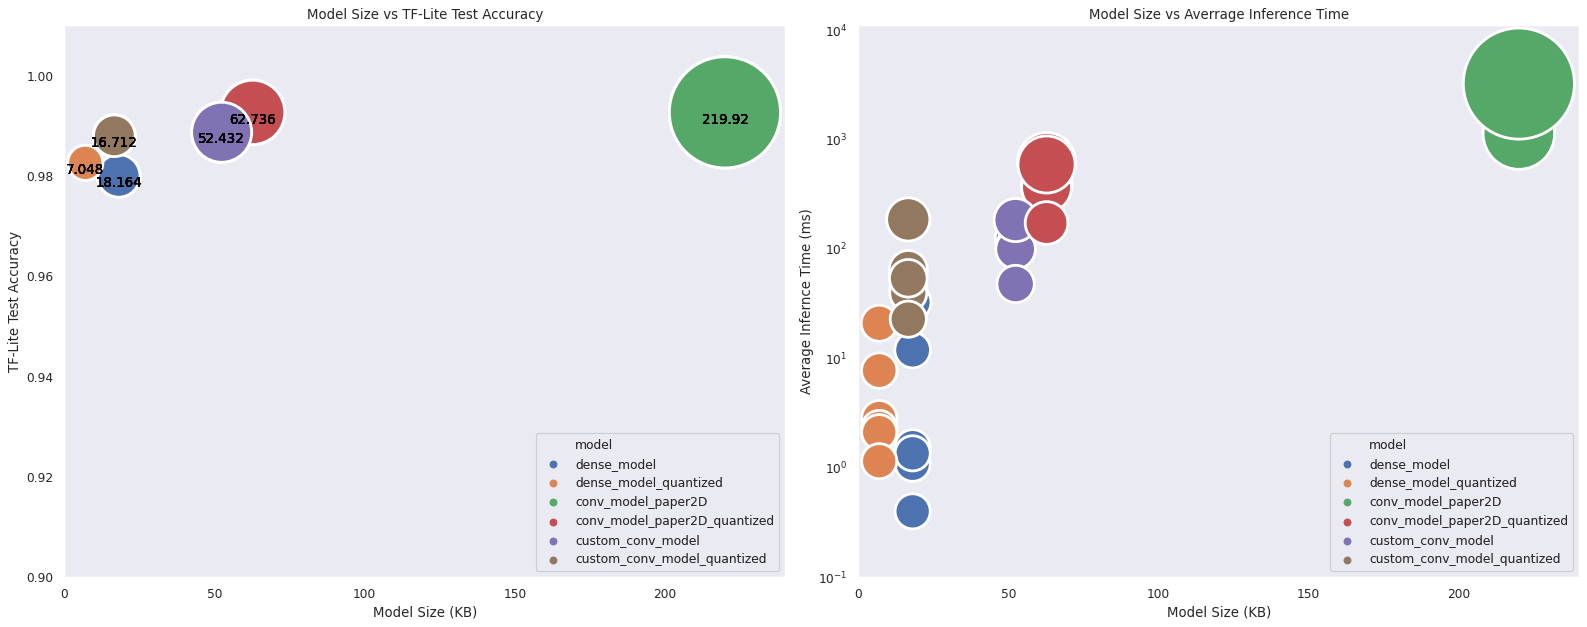

In [5]:
fig, ax1 = plt.subplots(1,2)
g=sns.scatterplot(data=model_mcu_data, x=(model_mcu_data.tflite_model_size_bytes/1000), y="tflite_test_acc", hue='model',
 sizes=(1000, 10000), size='tflite_model_size_bytes', ax=ax1[0])
g.grid(False)
h,l = g.get_legend_handles_labels()
l1 = g.legend(h[:int(len(h)/2)],l[:int(len(l)/2)], loc='lower right')
g.add_artist(l1) # we need this because the 2nd call to legend() eras
g.set_ylim(0.9,1.01)
g.set_xlim(0, 240)
g.set_xlabel('Model Size (KB)')
g.set_ylabel('TF-Lite Test Accuracy')
g.set_title('Model Size vs TF-Lite Test Accuracy')
for i,c in enumerate(model_mcu_data.tflite_model_size_bytes):
    g.annotate(c/1000, (model_mcu_data.tflite_model_size_bytes[i]/1000, model_mcu_data.tflite_test_acc[i]),
                horizontalalignment='center', verticalalignment='top', size=12, color='black')
#### =================================================================================================
g=sns.scatterplot(data=model_mcu_data, x=(model_mcu_data.tflite_model_size_bytes/1000), 
y=model_mcu_data.avg_inference_time_us/1000, hue='model',
 sizes=(1000, 10000), size='avg_inference_time_us',ax=ax1[1])

g.set(yscale="log")
g.set_xlim(0, 240)
g.set_ylim(0.1, 11000)
g.grid(False)
h,l = g.get_legend_handles_labels()
l1 = g.legend(h[:int(len(h)/2+1)],l[:int(len(l)/2+1)], loc='lower right')
g.add_artist(l1) # we need this because the 2nd call to legend() eras
g.set_xlabel('Model Size (KB)')
g.set_ylabel('Average Infernce Time (ms)')
# g.set_ylim(0, 10)
g.set_title('Model Size vs Averrage Inference Time')
plt.tight_layout()
plt.show()

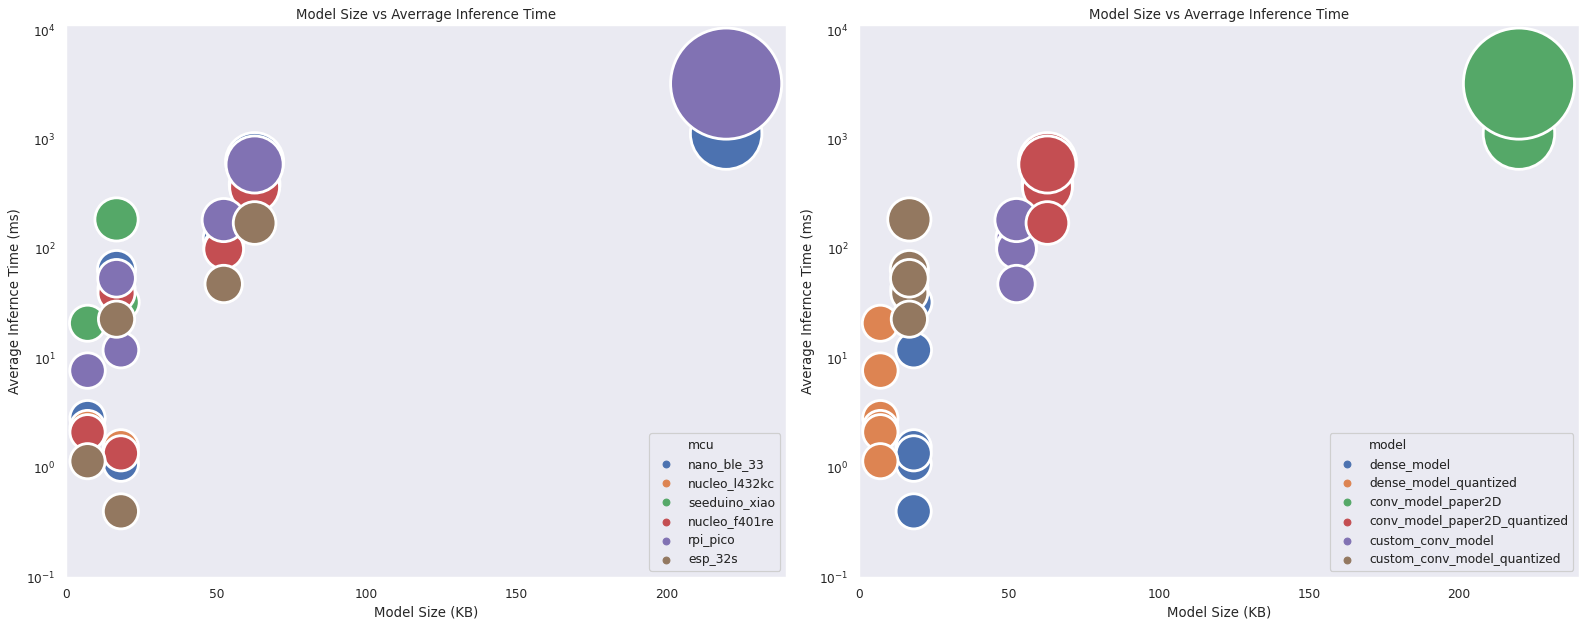

In [6]:
fig, ax1 = plt.subplots(1,2)
g=sns.scatterplot(data=model_mcu_data, x=(model_mcu_data.tflite_model_size_bytes/1000), 
y=model_mcu_data.avg_inference_time_us/1000, hue='mcu', ax=ax1[0],
 sizes=(1000, 10000), size='avg_inference_time_us')

g.set(yscale="log")
g.set_xlim(0, 240)
g.set_ylim(0.1, 11000)
g.grid(False)
h,l = g.get_legend_handles_labels()
l1 = g.legend(h[:int(len(h)/2+1)],l[:int(len(l)/2+1)], loc='lower right')
g.add_artist(l1) # we need this because the 2nd call to legend() eras
g.set_xlabel('Model Size (KB)')
g.set_ylabel('Average Infernce Time (ms)')
# g.set_ylim(0, 10)
g.set_title('Model Size vs Averrage Inference Time')
plt.tight_layout()
#### =================================================================================================
g=sns.scatterplot(data=model_mcu_data, x=(model_mcu_data.tflite_model_size_bytes/1000), 
y=model_mcu_data.avg_inference_time_us/1000, hue='model',
 sizes=(1000, 10000), size='avg_inference_time_us',ax=ax1[1])

g.set(yscale="log")
g.set_xlim(0, 240)
g.set_ylim(0.1, 11000)
g.grid(False)
h,l = g.get_legend_handles_labels()
l1 = g.legend(h[:int(len(h)/2+1)],l[:int(len(l)/2+1)], loc='lower right')
g.add_artist(l1) # we need this because the 2nd call to legend() eras
g.set_xlabel('Model Size (KB)')
g.set_ylabel('Average Infernce Time (ms)')
# g.set_ylim(0, 10)
g.set_title('Model Size vs Averrage Inference Time')
plt.tight_layout()
plt.show()

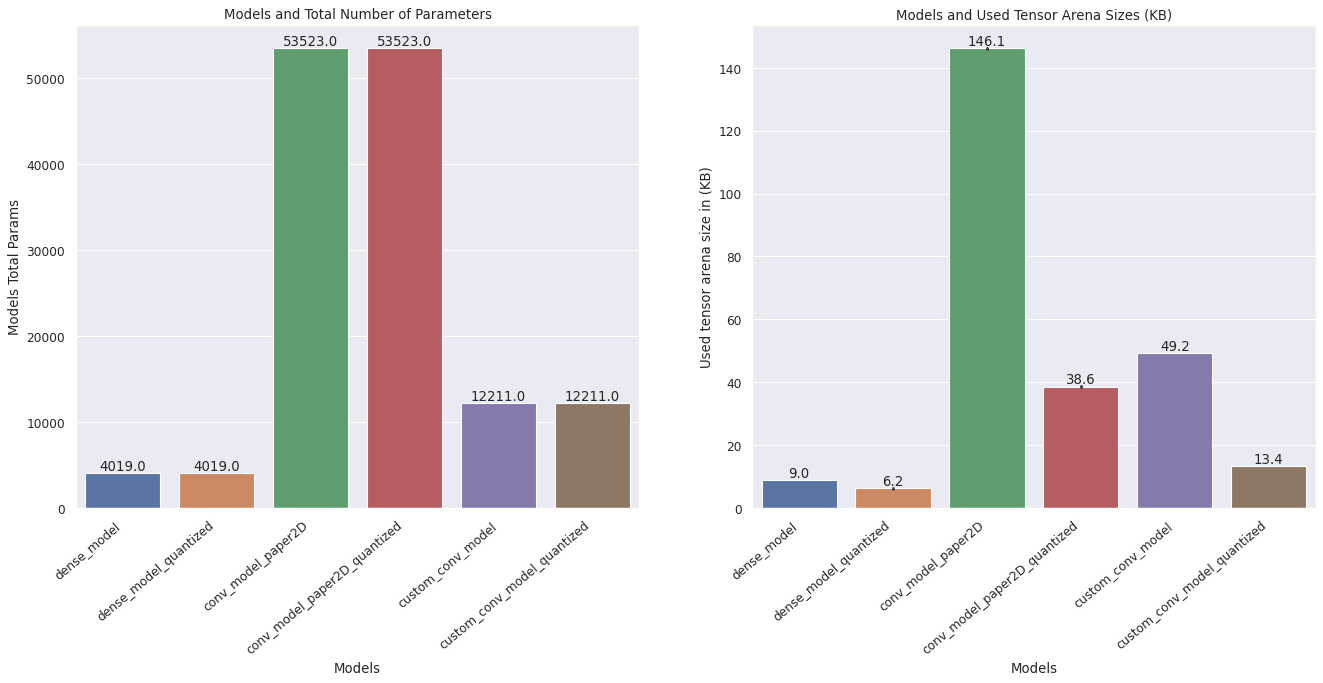

In [7]:

fig, ax1 = plt.subplots(1,2)
###================================================================================================
g = sns.barplot(x="model", y="total_params_training",data=model_mcu_data, ax=ax1[0])

ax1[0].set_ylabel('Models Total Params')
ax1[0].set_xlabel('Models')
ax1[0].set_title('Models and Total Number of Parameters')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0].containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax1[0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y=model_mcu_data.tensor_arena_size/1000,data=model_mcu_data, ax=ax1[1])
ax1[1].set_ylabel('Used tensor arena size in (KB)')
ax1[1].set_xlabel('Models')
ax1[1].set_title('Models and Used Tensor Arena Sizes (KB)')
ax1[1].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1].containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax1[1].bar_label(c, labels=labels, label_type='edge')              
###================================================================================================


### Plot Deployed Model Average Inference Time

[Text(0, 0, 'nano_ble_33'),
 Text(1, 0, 'nucleo_l432kc'),
 Text(2, 0, 'seeduino_xiao'),
 Text(3, 0, 'nucleo_f401re'),
 Text(4, 0, 'rpi_pico'),
 Text(5, 0, 'esp_32s')]

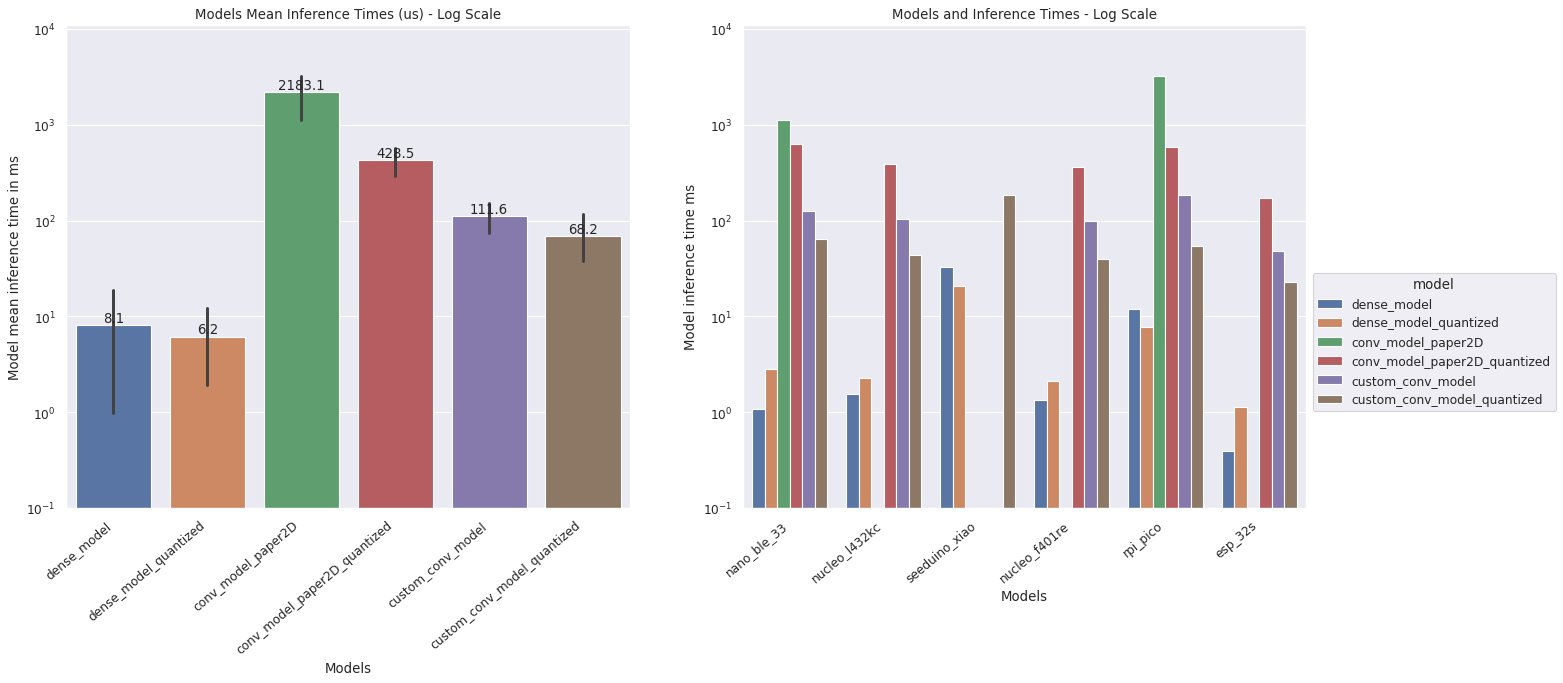

In [18]:

fig, ax1 = plt.subplots(1,2)
###================================================================================================
g = sns.barplot(x="model", y=model_mcu_data.avg_inference_time_us/1000,data=model_mcu_data, ax=ax1[0])

ax1[0].set_ylabel('Model mean inference time in ms')
ax1[0].set_xlabel('Models')
ax1[0].set_yscale('log')
ax1[0].set_ylim(0.1, 11000)
ax1[0].set_title('Models Mean Inference Times (us) - Log Scale')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=40, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0].containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax1[0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="mcu", y=model_mcu_data.avg_inference_time_us/1000, hue='model',data=model_mcu_data, ax=ax1[1])
ax1[1].set_ylabel('Model inference time ms')
ax1[1].set_xlabel('Models')
ax1[1].set_yscale('log')
ax1[1].set_ylim(0.1, 11000)
ax1[1].set_title('Models and Inference Times - Log Scale')
# ax1[1].legend(loc='upper left')
sns.move_legend(ax1[1], "upper left", bbox_to_anchor=(1, 0.5))
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), rotation=40, horizontalalignment='right')
# plt.tight_layout()
# iterate through the axes containers            
###================================================================================================


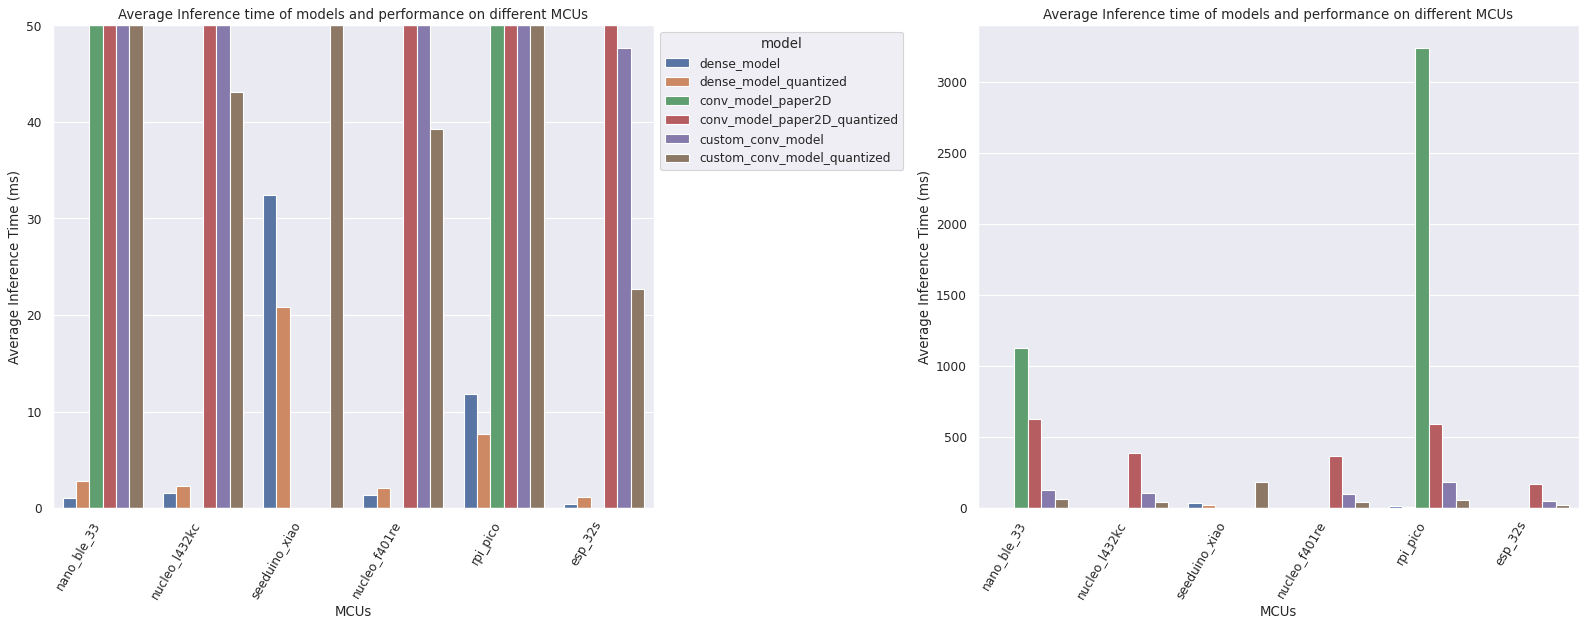

In [195]:

fig, ax1 = plt.subplots(1,2)
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
# Draw a nested barplot by species and sex
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.avg_inference_time_us/1000, hue="model",ax=ax1[0])
# g.despine(left=True)
g.set_ylabel("Average Inference Time (ms)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Average Inference time of models and performance on different MCUs", position=(0.5,1.05))
g.set_ylim(0, 50)
sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
###================================================================================================
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.avg_inference_time_us/1000, hue="model",ax=ax1[1])
# g.despine(left=True)
g.set_ylabel("Average Inference Time (ms)")
g.legend_.remove()
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Average Inference time of models and performance on different MCUs", position=(0.5,1.05))
plt.tight_layout()


### Plot Min,Max and Standard Deviation Values for each model

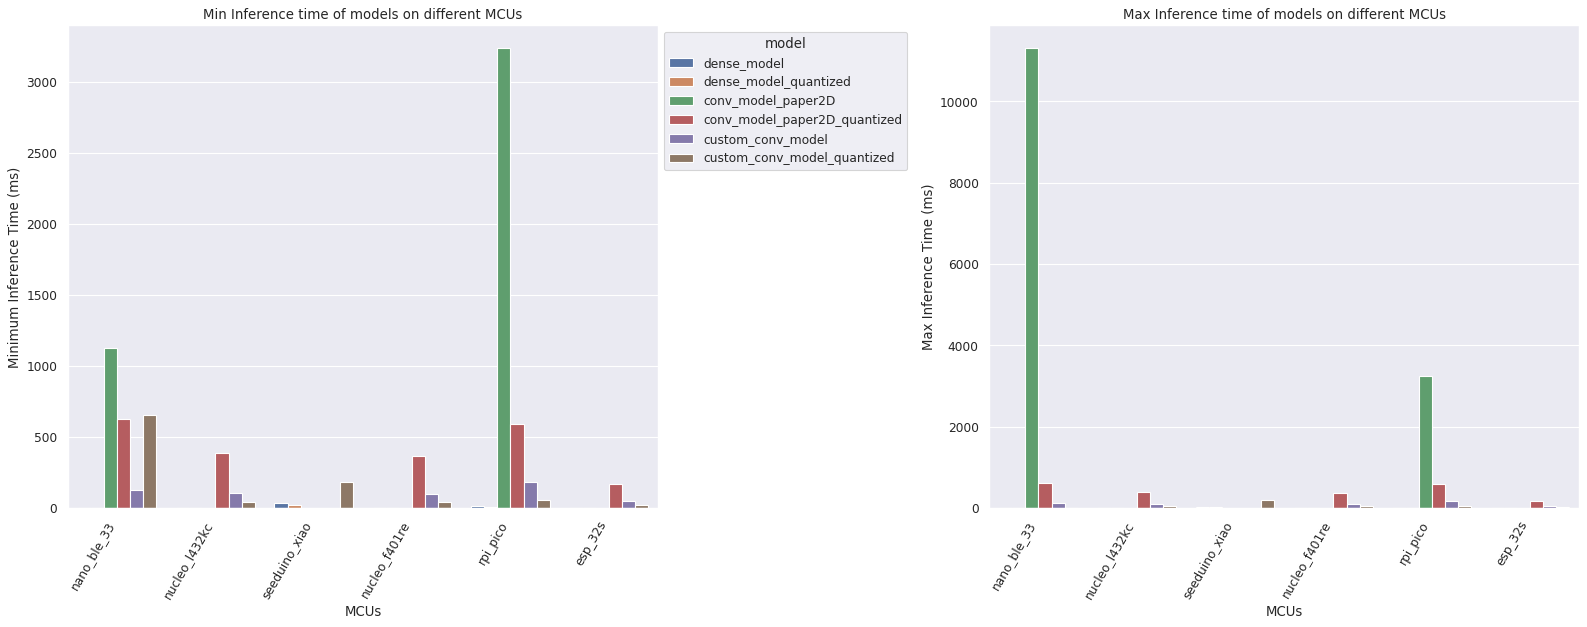

In [196]:

fig, ax1 = plt.subplots(1,2)
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
# Draw a nested barplot by species and sex
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.min_inference_time_us/1000, hue="model",ax=ax1[0])
# g.despine(left=True)
g.set_ylabel("Minimum Inference Time (ms)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Min Inference time of models on different MCUs", position=(0.5,1.05))
sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
###================================================================================================
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.max_inference_time_us/1000, hue="model",ax=ax1[1])
# g.despine(left=True)
g.set_ylabel("Max Inference Time (ms)")
g.legend_.remove()
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Max Inference time of models on different MCUs", position=(0.5,1.05))
plt.tight_layout()


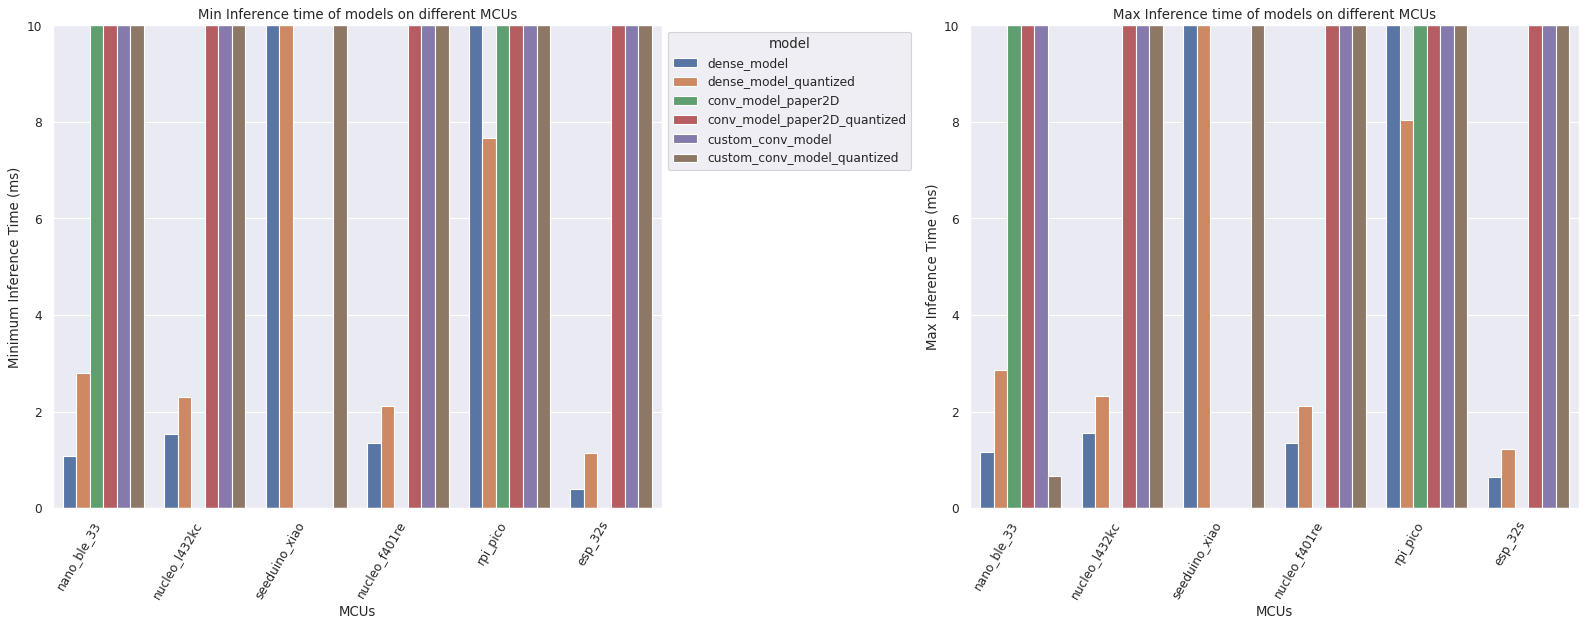

In [197]:

fig, ax1 = plt.subplots(1,2)
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
# Draw a nested barplot by species and sex
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.min_inference_time_us/1000, hue="model",ax=ax1[0])
# g.despine(left=True)
g.set_ylabel("Minimum Inference Time (ms)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Min Inference time of models on different MCUs", position=(0.5,1.05))
g.set_ylim(0, 10)
sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
###================================================================================================
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.max_inference_time_us/1000, hue="model",ax=ax1[1])
# g.despine(left=True)
g.set_ylabel("Max Inference Time (ms)")
g.legend_.remove()
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Max Inference time of models on different MCUs", position=(0.5,1.05))
g.set_ylim(0, 10)
plt.tight_layout()


### Plot Standard Deviation of Inference Time for each model

Text(0.5, 1.0, 'Standard Deviation of Inference time for each models on different MCUs')

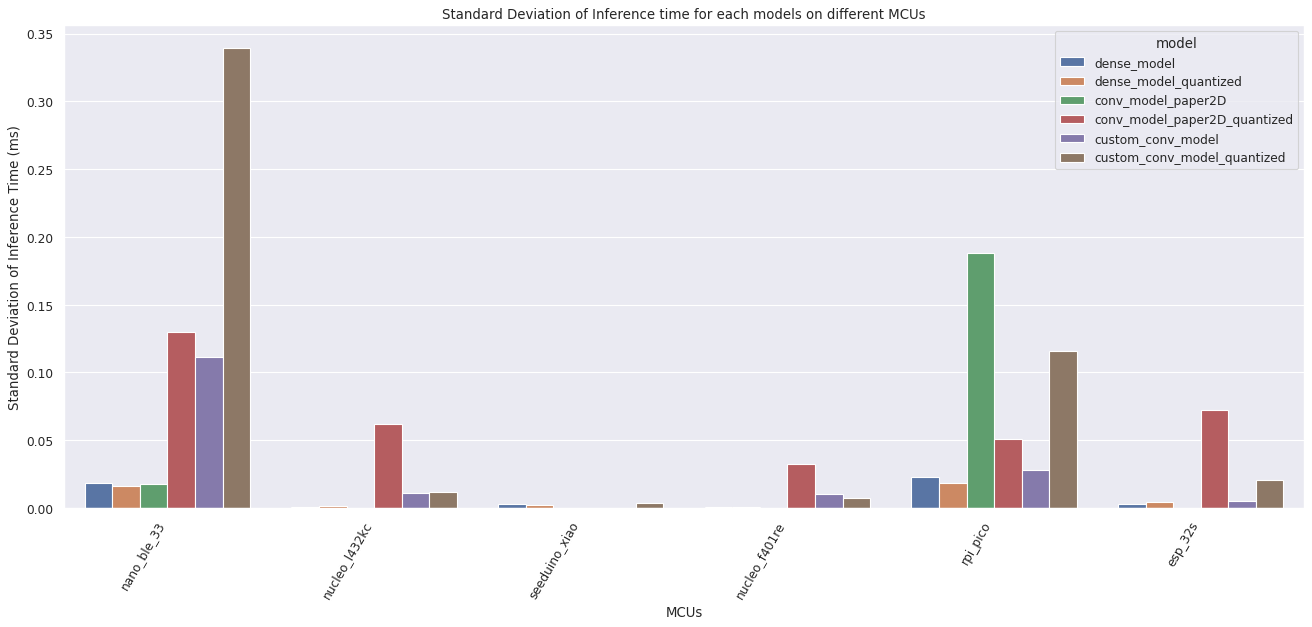

In [198]:
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.std_inference_time_us/1000, hue="model")
# g.despine(left=True)
g.set_ylabel("Standard Deviation of Inference Time (ms)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Standard Deviation of Inference time for each models on different MCUs", position=(0.5,1.05))

### Compare Flash Size and DRAM Size

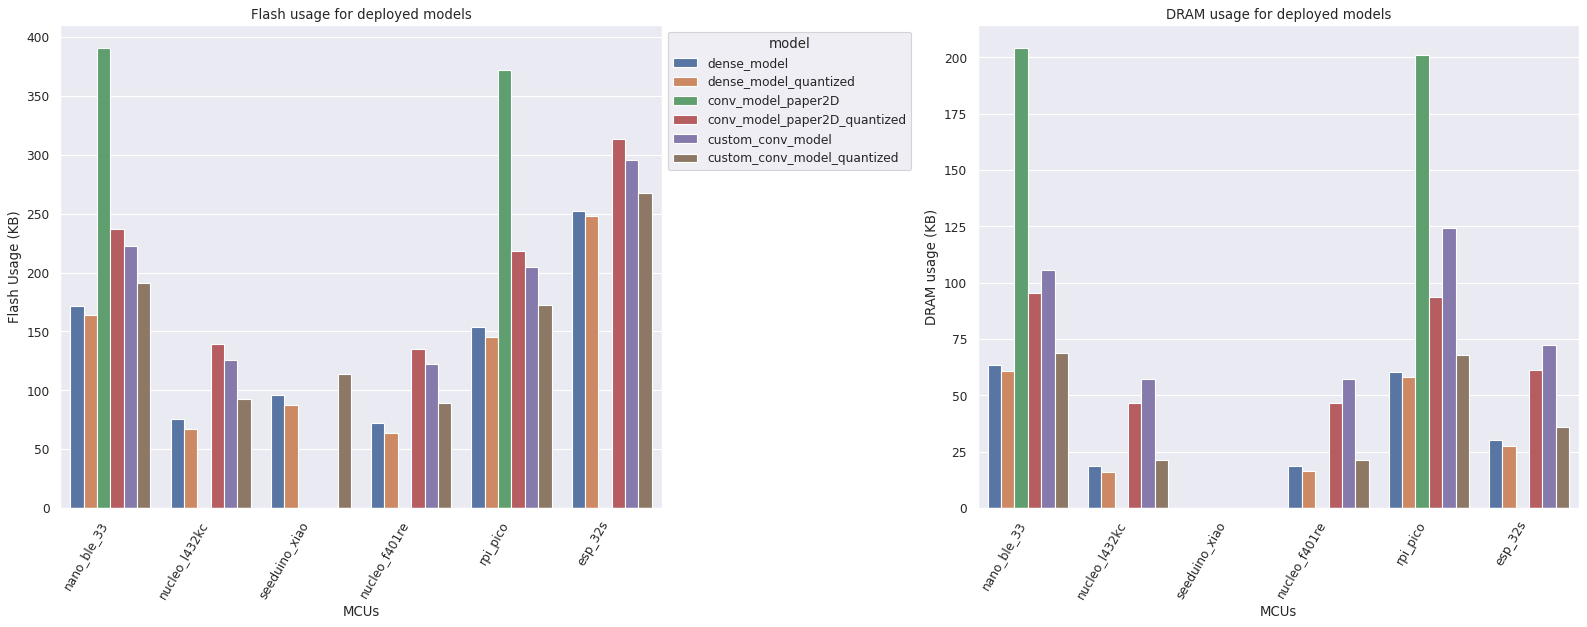

In [199]:
fig, ax1 = plt.subplots(1,2)
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
# Draw a nested barplot by species and sex
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.flash_usage_bytes/1000, hue="model",ax=ax1[0])
# g.despine(left=True)
g.set_ylabel("Flash Usage (KB)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Flash usage for deployed models", position=(0.5,1.05))
sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
###================================================================================================
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu",y=model_mcu_data.dram_usage_bytes/1000, hue="model",ax=ax1[1])
# g.despine(left=True)
g.set_ylabel("DRAM usage (KB)")
g.legend_.remove()
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("DRAM usage for deployed models", position=(0.5,1.05))
plt.tight_layout()


### Flash size and DRAM Size Usage Percentages

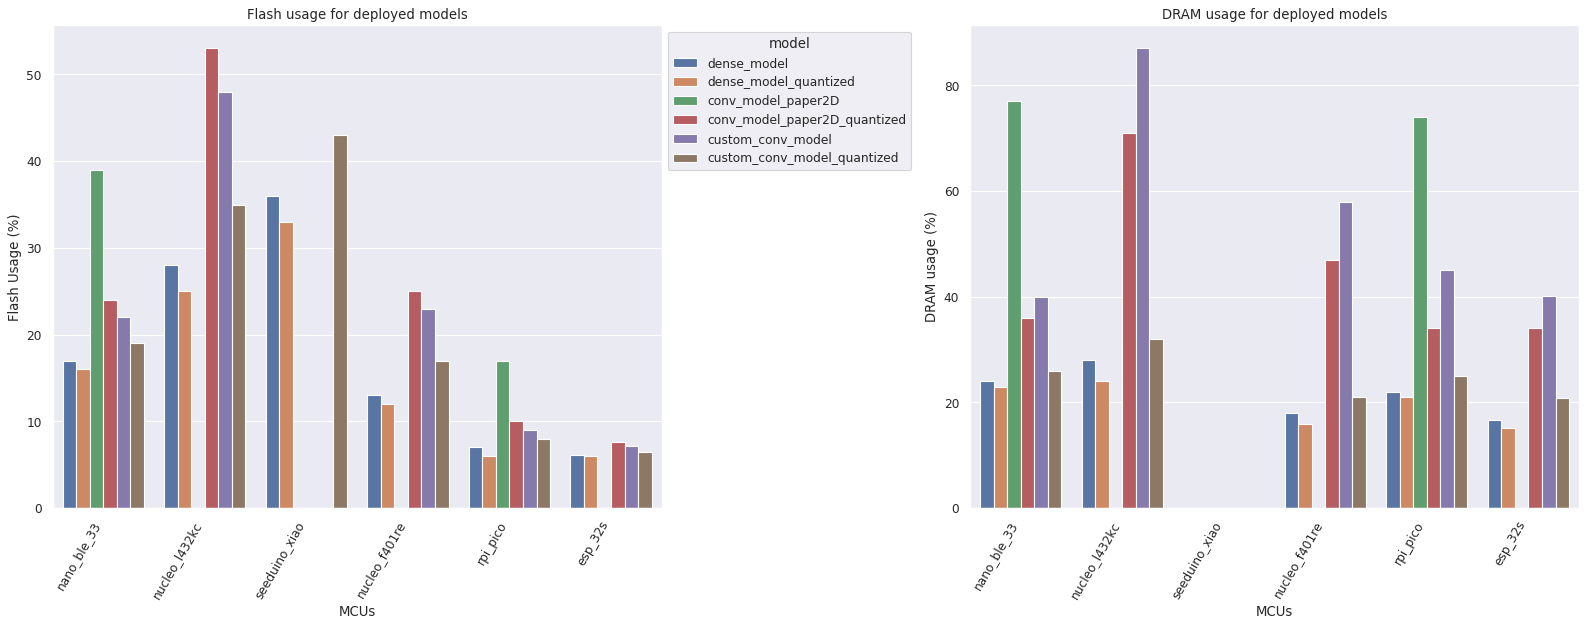

In [200]:
fig, ax1 = plt.subplots(1,2)
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(20, 8)})
# Draw a nested barplot by species and sex
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu", y=model_mcu_data.used_flash_percentage, hue="model",ax=ax1[0])
# g.despine(left=True)
g.set_ylabel("Flash Usage (%)")
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("Flash usage for deployed models", position=(0.5,1.05))
sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
###================================================================================================
g = sns.barplot(
    data=model_mcu_data, 
    x="mcu",y=model_mcu_data.used_dram_percentage, hue="model",ax=ax1[1])
# g.despine(left=True)
g.set_ylabel("DRAM usage (%)")
g.legend_.remove()
g.set_xlabel("MCUs")
g.set_xticklabels(rotation=60, horizontalalignment='right',labels=g.get_xticklabels())
g.set_title("DRAM usage for deployed models", position=(0.5,1.05))
plt.tight_layout()


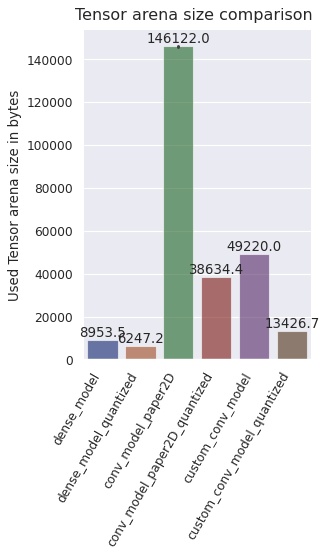

In [201]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":80, 'savefig.dpi':80, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="tensor_arena_size" ,
    palette="dark", alpha=0.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Used Tensor arena size in bytes")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Tensor arena size comparison", position=(0.5,1.02))
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [3]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
import numpy as np 
import tensorflow as tf 
# Using GPU
import os
import scipy.io as scpy

data = scpy.loadmat("all-data.mat")
# Extracting x_train from the mat file dictionary.
x_data = data["XTrain"]
# Extracting y_train from the mat file dictionary.
y_data = data["y_train"]
# Converting x_train and y_train to a numpy array.
x_data = np.array(x_data,dtype='float32')
y_data = np.array(y_data,dtype='float32')-1
x_temp_data=data['XTest']
y_temp_data=data['y_test']
x_temp_data=np.array(x_temp_data,dtype='float32')
y_temp_data=np.array(y_temp_data,dtype='float32')-1
# x_data=np.concatenate((x_data,x_temp_data),axis=0)
# y_data=np.concatenate((y_data,y_temp_data),axis=0)

# Verifying the shapes.
print(x_data.shape)
print(y_data.shape)

SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5, random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# BATCH_SIZE = 64
# # SHUFFLE_BUFFER_SIZE = 100
# train_dataset = train_dataset.batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)


2022-10-14 10:05:15.384095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 10:05:15.474445: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-14 10:05:15.491944: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 10:05:15.797939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

(15000, 1000)
(15000, 1)
 (10500, 2250, 2250)
 (10500, 2250, 2250)


In [23]:
print(x_train[0].shape)
print(np.linspace(0, 1, 1000).shape)

(1000,)
(1000,)


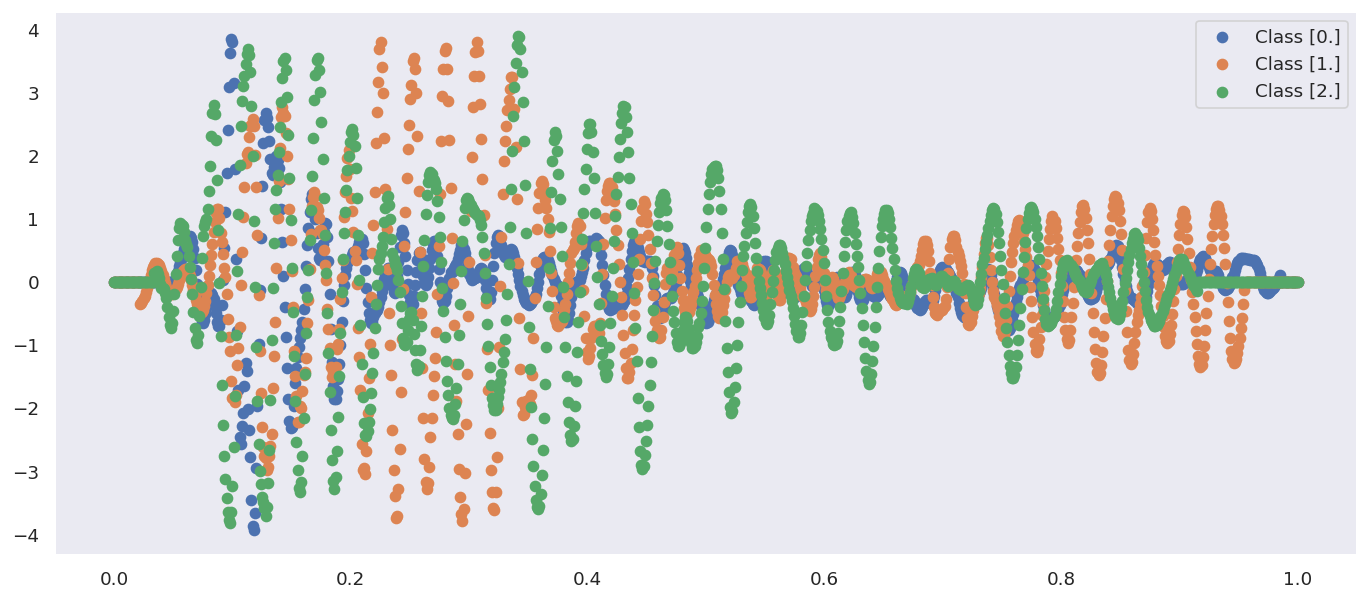

In [53]:
from re import A
import seaborn as sns 
import matplotlib.pyplot as plt
# sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(10, 5)})
# plt.scatter(y=x_train[0],x=np.linspace(0,1,1000))
# plt.show()
samples=1
class_num = 0
class_indices = np.where(y_train == class_num)[0]
class_data = x_train[class_indices]
class_output = y_train[class_indices]
class_indices_s = np.where(y_train == 1)[0]
class_data_s = x_train[class_indices_s]
class_output_s = y_train[class_indices_s]
class_indices_m = np.where(y_train == 2)[0]
class_data_m = x_train[class_indices_m]
class_output_m = y_train[class_indices_m]
plt.figure(figsize=(14, 6))
for i in range(samples):
    plt.scatter(x=np.linspace(0,1,1000),y=class_data[i], label=f"Class {class_output[i]}")
    plt.legend()
    plt.scatter(x=np.linspace(0,1,1000),y=class_data_s[i], label=f"Class {class_output_s[i]}")
    plt.legend()
    plt.scatter(x=np.linspace(0,1,1000),y=class_data_m[i], label=f"Class {class_output_m[i]}")
    plt.grid(False)
    plt.legend()

(3486, 1000)


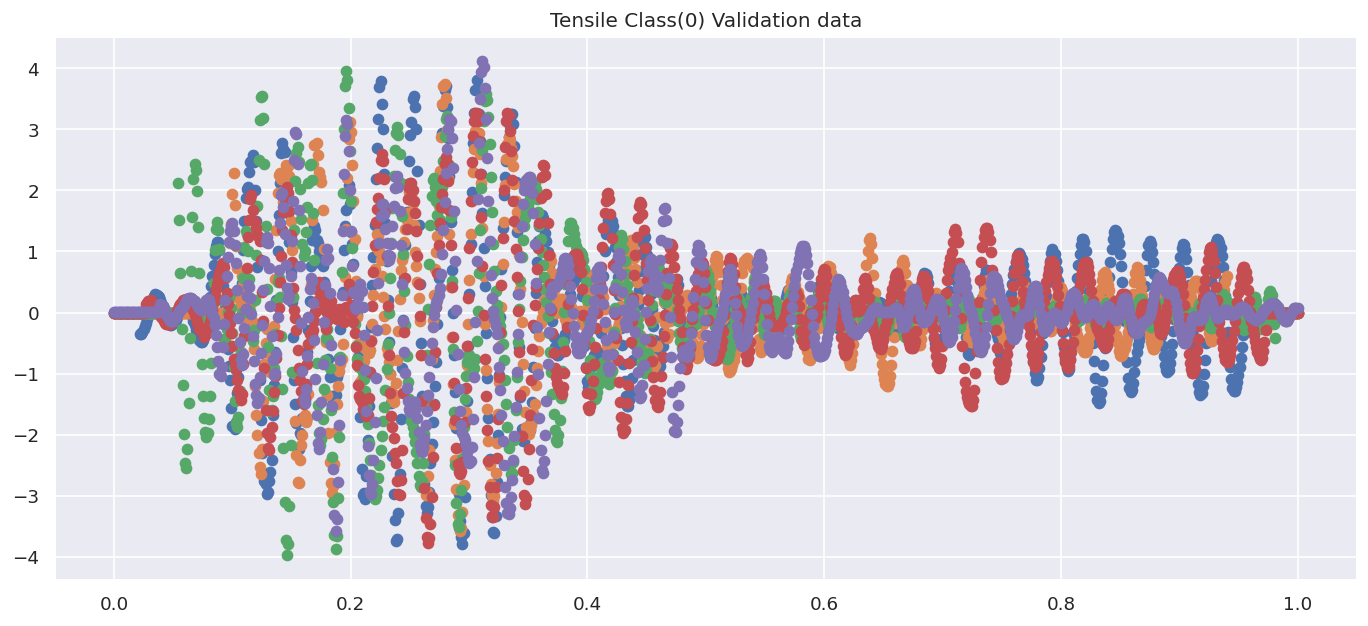